In [1]:
import pylab as plt
%matplotlib inline
import numpy as np
import pandas as pd
import math

Kaggle_train=pd.read_csv('data/train.csv', sep=',')
Kaggle_test=pd.read_csv('data/test.csv', sep=',')

Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 29 days


In [2]:
Kaggle_train.shape

(42000, 785)

In [3]:
Kaggle_test.shape

(28000, 784)

In [4]:
X_all, y_all = Kaggle_train.ix[:, 1::], Kaggle_train.ix[:, 0]

In [6]:
from sklearn.cross_validation import train_test_split
X, X_test, y, y_test = train_test_split(X_all, y_all, test_size=0.25, random_state=42)

In [7]:
X.shape

(31500, 784)

In [8]:
X_test.shape

(10500, 784)

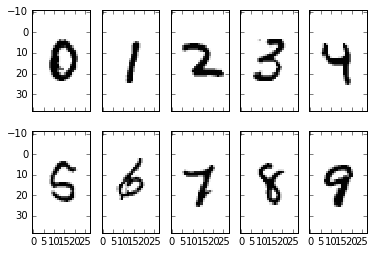

In [9]:
fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True,)
ax = ax.flatten()

for i in range(10):
    img = X.ix[y==i].iloc[0].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')
plt.show()

## Local NN implementation

In [11]:
from NeuralNetMLP import NeuralNetMLP

### Train / Validation data set split

In [12]:
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.20, random_state=42)

### Initialization of a NN model

In [79]:
nn = NeuralNetMLP(n_output=10, 
                  n_features=X_train.shape[1], 
                  n_hidden=50, 
                  l2=0.3, 
                  l1=0.1, 
                  epochs=700, 
                  eta=0.001,
                  alpha=0.001,
                  decrease_const=0.00001,
                  minibatches=100, 
                  shuffle=False,
                  random_state=1)

In [80]:
nn.fit(X_train.values, y_train.values, print_progress=True)

Epoch: 700/700

In [81]:
X_train.shape

(25200, 784)

In [82]:
y_train.shape

(25200,)

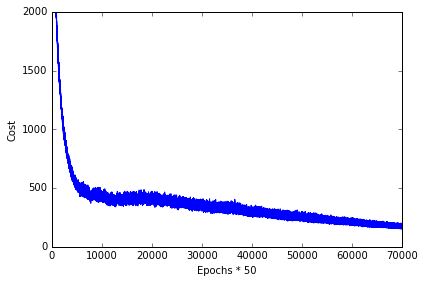

In [83]:

%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(range(len(nn.cost_)), nn.cost_)
plt.ylim([0, 2000])
plt.ylabel('Cost')
plt.xlabel('Epochs * 50')
plt.tight_layout()
# plt.savefig('./figures/cost.png', dpi=300)
plt.show()

In [84]:
batches = np.array_split(range(len(nn.cost_)), 700)
cost_ary = np.array(nn.cost_)
cost_avgs = [np.mean(cost_ary[i]) for i in batches]

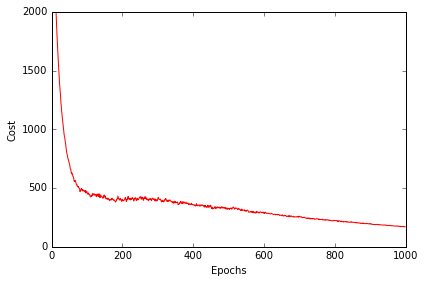

In [85]:
plt.plot(range(len(cost_avgs)), cost_avgs, color='red')
plt.ylim([0, 2000])
plt.ylabel('Cost')
plt.xlabel('Epochs')
plt.tight_layout()
#plt.savefig('./figures/cost2.png', dpi=300)
plt.show()

### Check training and validatin acc

In [86]:
y_train_pred = nn.predict(X_train)

In [87]:
acc = (np.sum(y_train == y_train_pred, axis=0)).astype('float') / X_train.shape[0]
print('Training accuracy: %.3f%%' % (acc * 100))

Training accuracy: 97.448%


In [88]:
y_validation_pred = nn.predict(X_validation)

In [89]:
acc_validation = (np.sum(y_validation == y_validation_pred, axis=0)).astype('float') / X_validation.shape[0]
print('Training accuracy: %.3f%%' % (acc_validation * 100))

Training accuracy: 94.952%


### Check what is predicted wrong:

/Users/fuyangliu/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index


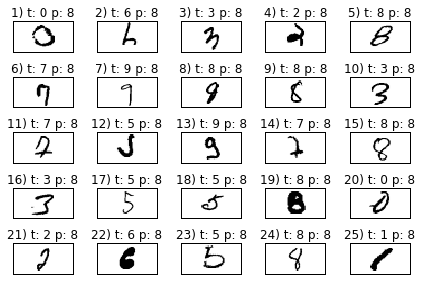

In [90]:
miscl_img = X_validation[y_validation != y_validation_pred][:25].values
correct_lab = y_validation[y_validation != y_validation_pred][:25]
correct_lab = correct_lab.values
miscl_lab= y_validation_pred[y_validation != y_validation_pred][:25]

fig, ax = plt.subplots(nrows=5, ncols=5, sharex=True, sharey=True,)
ax = ax.flatten()
for i in range(25):
    img = miscl_img[i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')
    ax[i].set_title('%d) t: %d p: %d' % (i+1, correct_lab[i], miscl_lab[i]))

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
# plt.savefig('./figures/mnist_miscl.png', dpi=300)
plt.show()

In [50]:
correct_lab.values

array([0, 5, 3, 2, 4, 7, 9, 8, 8, 3, 7, 4, 5, 9, 9, 7, 8, 4, 3, 5, 8, 0, 0,
       2, 8])

In [49]:
miscl_lab

array([8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8])

## Kaggle Test data prediction:

In [99]:
nn = NeuralNetMLP(n_output=10, 
                  n_features=784, 
                  n_hidden=50, 
                  l2=0.3, 
                  l1=0.1, 
                  epochs=700, 
                  eta=0.001,
                  alpha=0.001,
                  decrease_const=0.00001,
                  minibatches=100, 
                  shuffle=False,
                  random_state=1)

In [100]:
nn.fit(X_all.values, y_all.values, print_progress=True)

Epoch: 700/700

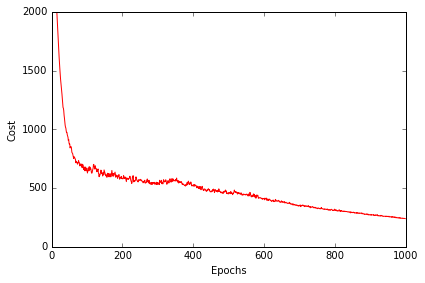

In [101]:
batches = np.array_split(range(len(nn.cost_)), 1000)
cost_ary = np.array(nn.cost_)
cost_avgs = [np.mean(cost_ary[i]) for i in batches]

plt.plot(range(len(cost_avgs)), cost_avgs, color='red')
plt.ylim([0, 2000])
plt.ylabel('Cost')
plt.xlabel('Epochs')
plt.tight_layout()
#plt.savefig('./figures/cost2.png', dpi=300)
plt.show()

In [102]:
Kaggle_test_pred = nn.predict(Kaggle_test)

In [103]:
Kaggle_test_pred[0:5]

array([2, 0, 9, 9, 3])

In [121]:
import csv as csv
predictions_file = open("Step1-SimpleModel.csv", "wb")
predictions_file_object = csv.writer(predictions_file)
predictions_file_object.writerow(["ImageId", "Label"]) # write the column headers
#predictions_file_object.writerows(np.expand_dims(Kaggle_test_pred, axis=1))
predictions_file_object.writerows(zip(range(1,28001), Kaggle_test_pred))
predictions_file.close()

In [120]:
np.expand_dims(Kaggle_test_pred, axis=1)

array([[2],
       [0],
       [9],
       ..., 
       [3],
       [9],
       [2]])

## This gives Kaggle Acc Score: 0.95171